In [26]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus'] =False 

# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2

# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y))

# 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("DTW距离:", dist)
    # print("DTW对齐路径:", path)

def vis(sumo, ctm, time0:np.array):
    maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    # 'time':time0
    })
    print(maindf.describe())
    
    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
# plt.ylim(0, 30)
    plt.show()


# # 构造数据
    width = 15  # 每个柱子的宽度

# plt.figure(dpi=300)

    ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, 'ctm', 'sumo')
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    plt.show()


    # corr = maindf.corr() 
    # print(corr)
    # sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    # plt.show()
    cov = maindf.cov()
    print(cov)
    sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
    plt.show()


    sns.lmplot(
    data = maindf,
    x='ctm',
    y='sumo',
    order=1
    )
    plt.show()


    temp = sumo[0]
    for i in range(1, len(sumo)):
        sumo[i] += temp
        temp = sumo[i]
    temp = ctm[0]
    for i in range(1, len(ctm)):
        ctm[i] += temp
        temp = ctm[i]
    plt.plot(time0, sumo, label="sumo")
    plt.plot(time0, ctm, label="ctm")
    plt.legend()
    plt.show()


#     import numpy as np
#     ctm = np.array(ctm).reshape((-1, 1))
#     sumo = np.array(sumo)
#     from sklearn.linear_model import LinearRegression
#     model = LinearRegression()
# # 训练模型
#     model.fit(ctm, sumo)
# # 计算预测值
#     y_pred = model.predict(ctm)
# # 绘制原始数据和拟合直线
#     plt.scatter(ctm, sumo)
#     plt.plot(ctm, y_pred, color='red')
#     plt.show()
#     print(model.coef_, model.intercept_)

# ga test

In [1]:
from webster import phase4webster
phase4webster()

[16, 5, 9, 3]

In [28]:
[1].extend([2,3])

In [22]:
def test():
    a = [1,2,3]
    print(a)


In [26]:
m.__dict__

{'a': [1, 3, 2]}

In [23]:
m = test

In [25]:
m.__setattr__('a',[1,3,2])
m()

[1, 2, 3]


In [12]:
m.a = 2
m.t_print()

AttributeError: 'function' object has no attribute '_t_print'

In [ ]:
import numpy as np



# nodelay

MAE: 2.7413702368997224
MSE: 10.012518945289552
DTW距离: 41.94915556577486
            sumo        ctm
count  24.000000  24.000000
mean    6.958813   4.636570
std     1.178570   2.576893
min     3.948511   1.399860
25%     6.391033   2.917963
50%     6.657955   4.291772
75%     7.561187   6.312025
max     9.795775  13.410965


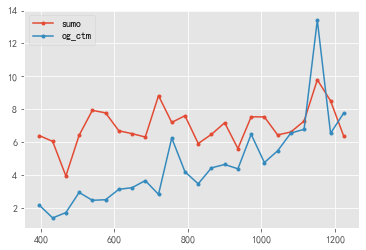

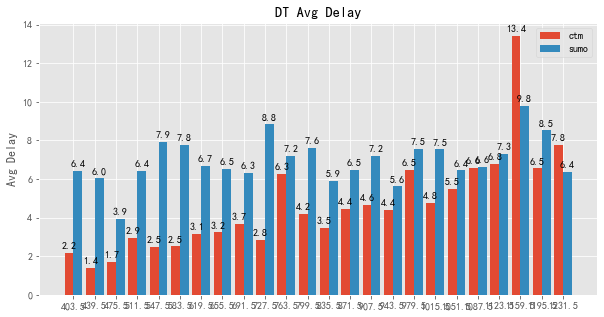

          sumo       ctm
sumo  1.389028  1.604422
ctm   1.604422  6.640379


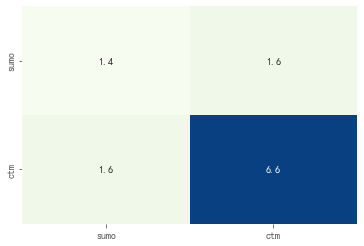

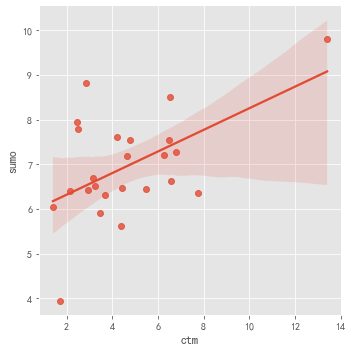

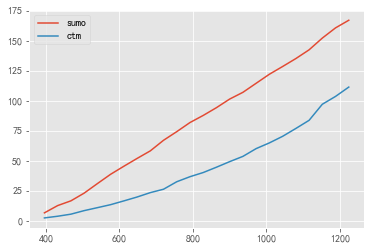

In [8]:
# sumo=[6.8780879410464975, 6.479949338404423, 5.33064101584264, 6.595677287026626, 5.134033385043291, 9.52792200647576, 7.755956850093166, 7.156637306905878, 9.006302339078553, 9.718845315027128, 9.945120102010799, 7.214659195860515, 7.530538531509291, 11.535241639703331, 8.112880094549903, 9.288992387412941, 8.811376221802442, 12.241171724274697, 11.033572104624314, 11.974253945455152, 12.01844324504061, 13.799747125760408, 10.017462556875913, 10.910715602125535]
# ctm= [2.167114344510165, 1.9755153222517534, 1.3898216594349255, 4.091266718777743, 2.259645028547807, 3.831960504705256, 4.270049875432795, 3.762921853498979, 4.542184309525923, 5.929709347811612, 4.917835755781694, 4.477008906277743, 3.30527045510032, 6.264550469138405, 4.852973331104625, 6.704839359630238, 5.854591889814897, 9.961214932528408, 8.494559201327236, 9.112174294211648, 11.020867607810281, 14.796392267400568, 8.836071707985617, 7.623691558837891]
# time0= [399, 439, 478, 521, 564, 607, 650, 694, 741, 786, 829, 874, 918, 969, 1017, 1067, 1116, 1172, 1225, 1279, 1335, 1392, 1448, 1504]
sumo=[6.400980537746106, 6.04987758758875, 3.948510725373225, 6.420209056347127, 7.936941186282669, 7.782229592470004, 6.69501931040365, 6.519586769671082, 6.3154938479464935, 8.82991150331588, 7.202372707856565, 7.610972505073725, 5.920054147201226, 6.478337982055352, 7.181338118280356, 5.613868952926021, 7.544591302113275, 7.537576016956764, 6.444226799475095, 6.620891110295923, 7.285941303449535, 9.795775481131681, 8.515619648987755, 6.36118959097196]
ctm= [2.167114344510165, 1.3998599485917524, 1.723218939521096, 2.9467740925875576, 2.470723498951305, 2.504578937183727, 3.1374294107610528, 3.2370016791603784, 3.6672691865400835, 2.8315310044722124, 6.255599368702281, 4.200178926641291, 3.471904017708518, 4.4410553845492275, 4.646989648992365, 4.383364590731534, 6.481301134282893, 4.765302484685725, 5.476039973172274, 6.556960019198331, 6.782391288063743, 13.410965312610973, 6.544602567499334, 7.775525179776278]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay 5

MAE: 3.1231042603149626
MSE: 12.36111472265288
DTW距离: 44.64309416128578
            sumo        ctm
count  24.000000  24.000000
mean    6.997025   3.873921
std     1.094066   1.853157
min     4.135755   1.416235
25%     6.365864   2.380797
50%     6.951943   3.330869
75%     7.573109   4.731288
max     8.986885   8.085475


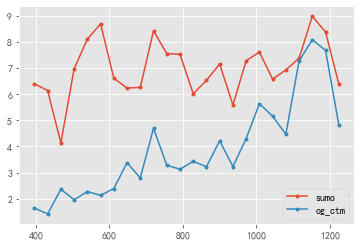

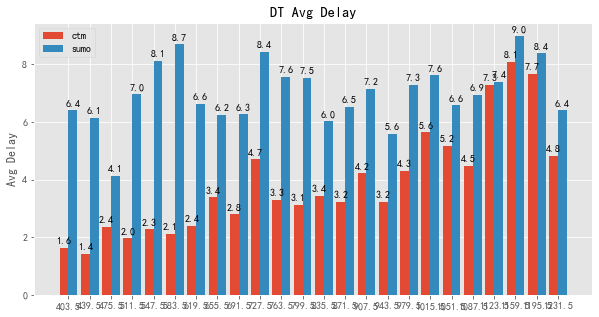

          sumo       ctm
sumo  1.196980  0.955237
ctm   0.955237  3.434192


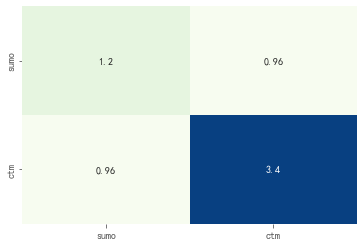

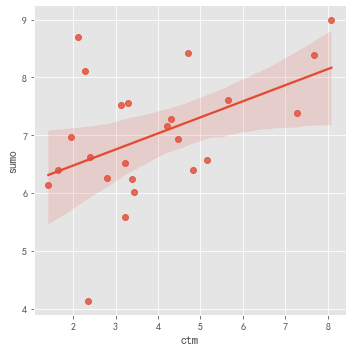

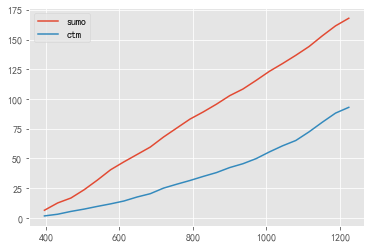

In [5]:
sumo=[6.400980537746106, 6.141392811507151, 4.135755150596392, 6.972059590814462, 8.110058085571554, 8.693600911532426, 6.615628718170916, 6.237009772461962, 6.260515772954867, 8.428692419767298, 7.558928498535625, 7.529264385017484, 6.017613263326525, 6.528252838725018, 7.158031556040822, 5.585397043483033, 7.280182639517487, 7.615649354878825, 6.5764995581437296, 6.9318261948384725, 7.377834183515159, 8.986885458515092, 8.38424952183055, 6.402286398565403]
ctm= [1.6387988220561633, 1.4162345366044478, 2.36101432280107, 1.9567433270541104, 2.272557995536111, 2.126090743324973, 2.387391437183727, 3.3790174397555264, 2.7933294122869317, 4.697423414750532, 3.2827201756564053, 3.1259231133894487, 3.4297854250127617, 3.224364844235507, 4.216842217878862, 3.2315529476512563, 4.297638806429776, 5.63699332150546, 5.1593663475730205, 4.466036016290838, 7.27562817660245, 8.085475401444869, 7.680281725796786, 4.8328824476762255]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay5+pred

MAE: 2.939461839052067
MSE: 11.62454805239299
DTW距离: 40.70041647245123
            sumo        ctm
count  24.000000  24.000000
mean    6.703832   3.892497
std     1.133022   1.600471
min     4.135755   1.530204
25%     6.136485   2.399638
50%     6.469794   3.607534
75%     7.714250   4.773880
max     8.776607   6.675748


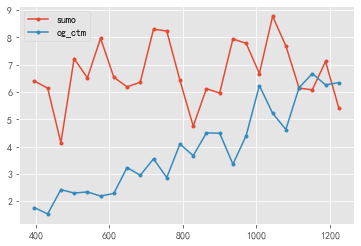

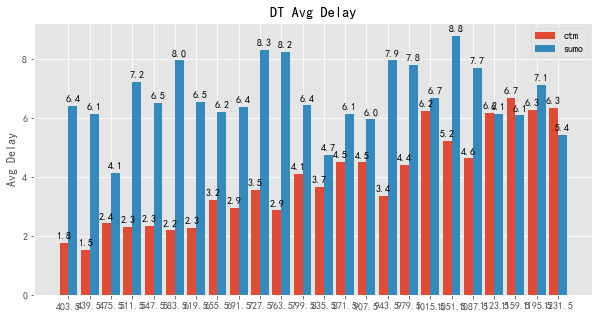

          sumo       ctm
sumo  1.283740 -0.018739
ctm  -0.018739  2.561507


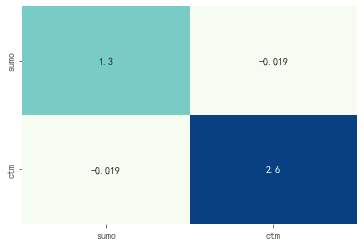

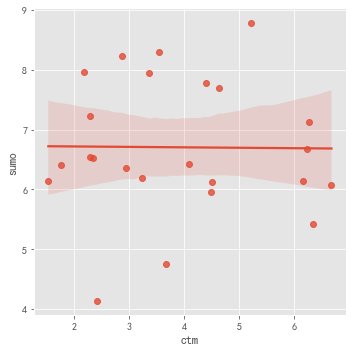

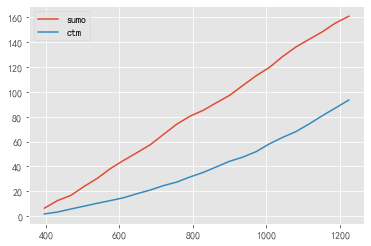

In [22]:
sumo=[6.400980537746106, 6.141392811507151, 4.135755150596392, 7.223882747331744, 6.517381812556294, 7.966207570944689, 6.540299202986853, 6.18849114625032, 6.357921216761601, 8.303230945356509, 8.234479993421695, 6.4222069768011805, 4.747071455923115, 6.1217611430895476, 5.960367809778477, 7.945573374707459, 7.782291341754778, 6.676243909231844, 8.776607216024159, 7.691569258221159, 6.142152808925018, 6.079831071800369, 7.119340247306903, 5.416921029137948]
ctm= [1.7621200734918767, 1.530203710902821, 2.4207667870955034, 2.295201908458363, 2.3362534696405586, 2.185042988170277, 2.280995412306352, 3.2293044437061655, 2.9479230533946645, 3.5491900010542436, 2.8638289191506128, 4.093402082269842, 3.6658781225031074, 4.500226974487305, 4.488531892949885, 3.354976610703902, 4.399175210432573, 6.233883771029386, 5.221609202298251, 4.624636389992454, 6.156978173689409, 6.675748391584917, 6.2603443319147285, 6.3437019694935195]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay10

MAE: 3.124514216142989
MSE: 11.5594332426777
DTW距离: 47.346598534536895
            sumo        ctm
count  24.000000  24.000000
mean    6.882912   3.758398
std     1.064570   1.577552
min     4.581542   1.350815
25%     6.256423   2.697528
50%     6.884193   3.521226
75%     7.379707   4.220501
max     9.420561   7.226631


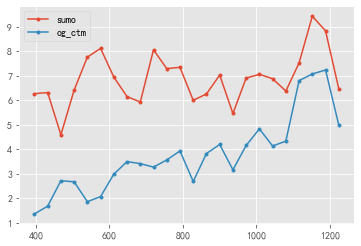

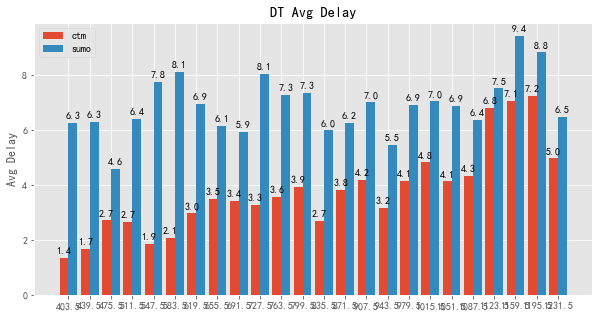

          sumo       ctm
sumo  1.133309  0.873506
ctm   0.873506  2.488671


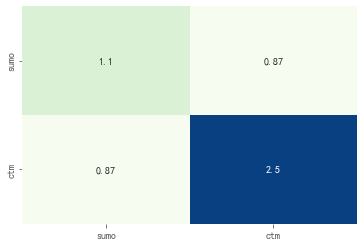

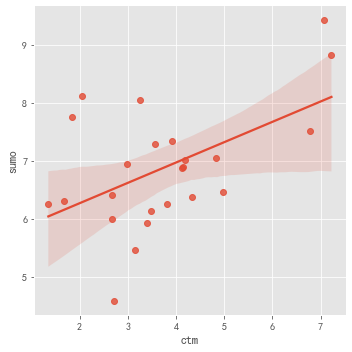

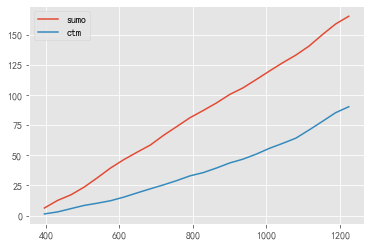

In [6]:
sumo=[6.259114264236073, 6.306243043204223, 4.581542011147033, 6.404281616448956, 7.752909955462429, 8.108066360842644, 6.938453780905534, 6.138414053024498, 5.919399324574832, 8.051456967765311, 7.282722159253627, 7.334575228004266, 5.98884651887158, 6.248348456823007, 7.018685814767439, 5.452970427568943, 6.8974041613681605, 7.049323140763934, 6.87098084400594, 6.366205784812842, 7.515102977077232, 9.42056117668483, 8.824019684951669, 6.46025537885032]
ctm= [1.3508146459406072, 1.6679258780045942, 2.7045705101706763, 2.6626506718722256, 1.8504487384449353, 2.0585324547507544, 2.9738003557378594, 3.4880529750477183, 3.4032802148298784, 3.2614837993275034, 3.5543985800309614, 3.92174937508323, 2.676402438770641, 3.8141731782393022, 4.186489798805931, 3.1529350714250044, 4.144122817299583, 4.821827628395774, 4.123485738580877, 4.322533173994585, 6.791403510353782, 7.064079371365634, 7.226631424643776, 4.979749592867765]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay10+pred

MAE: 3.0354764589338585
MSE: 11.901949639754093
DTW距离: 45.71524937283002
            sumo        ctm
count  24.000000  24.000000
mean    6.590835   3.648078
std     1.025787   1.546085
min     4.135755   1.346332
25%     6.110444   2.696783
50%     6.461670   3.320072
75%     7.305839   4.888910
max     8.347581   6.893317


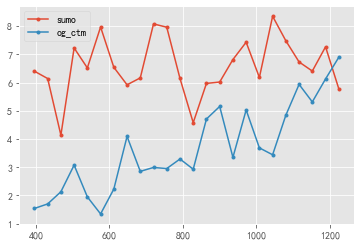

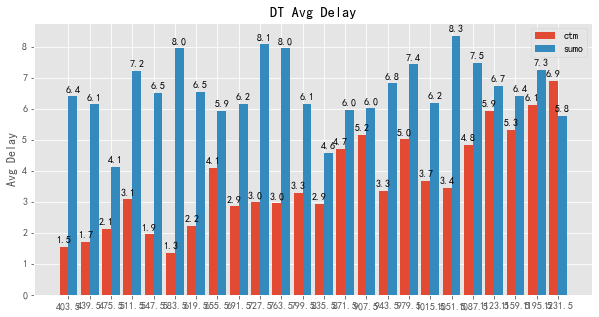

          sumo       ctm
sumo  1.052239  0.029761
ctm   0.029761  2.390379


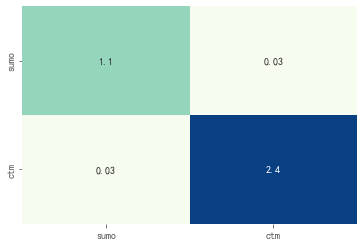

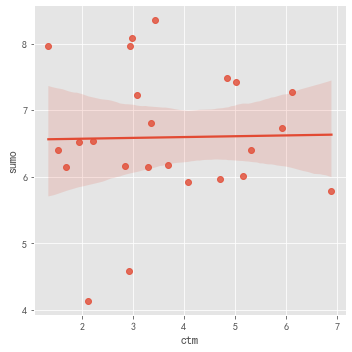

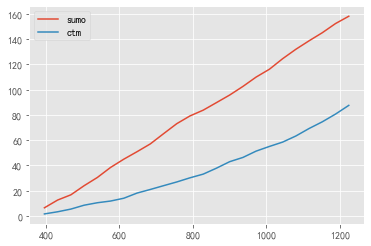

In [23]:
sumo=[6.400980537746106, 6.141392811507151, 4.135755150596392, 7.223882747331744, 6.517381812556294, 7.966207570944689, 6.540299202986853, 5.919357093848474, 6.1644824220548475, 8.076155868871814, 7.959196675446335, 6.143824125627995, 4.5779597706228, 5.968628647586261, 6.017599026246298, 6.813976993399018, 7.42799793740156, 6.179499316930683, 8.347580786059828, 7.4780856891955585, 6.728034517230133, 6.4059578140356095, 7.2651193151059354, 5.780676111465449]
ctm= [1.5404582023620605, 1.7000513727014714, 2.1311957185918633, 3.0754995346069336, 1.9496165622364392, 1.346332159909335, 2.225737788460471, 4.090516783974388, 2.85379864952781, 2.99174503846602, 2.9531899365511807, 3.290881460363215, 2.930261005054821, 4.708158753134987, 5.152472149242055, 3.3492625843394888, 5.02767259424383, 3.685590137134899, 3.4415559335188433, 4.842656308954412, 5.9340598366477275, 5.313063968311656, 6.1267852783203125, 6.893317049199885]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay15

MAE: 3.3615755833503975
MSE: 12.685184893572822
DTW距离: 54.14843886182034
            sumo        ctm
count  24.000000  24.000000
mean    7.040368   3.678792
std     0.837509   1.556438
min     4.910713   1.246021
25%     6.559085   2.323787
50%     7.056570   3.686417
75%     7.410867   4.646924
max     8.841557   6.738837


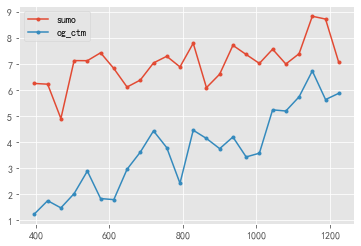

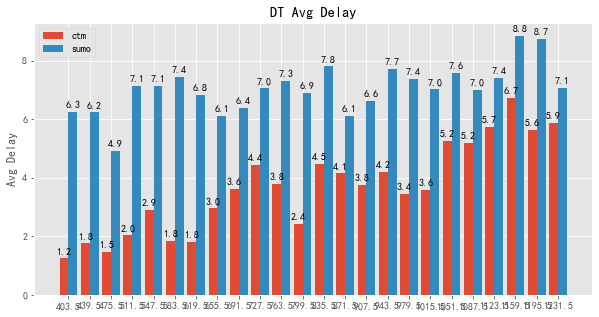

          sumo       ctm
sumo  0.701422  0.839354
ctm   0.839354  2.422498


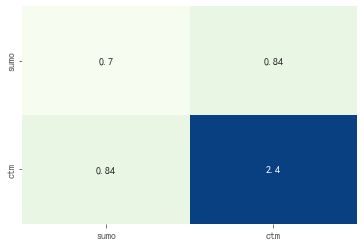

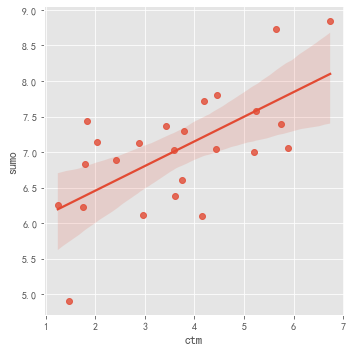

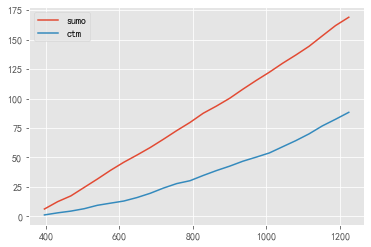

In [9]:
sumo=[6.259114264236073, 6.230879179807846, 4.910712793147511, 7.137701408581039, 7.133647099752414, 7.437552162322041, 6.834762611485845, 6.121376214662554, 6.3896218657145765, 7.047880870964132, 7.303020596520192, 6.895052991586343, 7.803926339480921, 6.098702355098881, 6.615573173099161, 7.723547499343322, 7.37261830131807, 7.029807303394167, 7.575291183501119, 7.006287063182169, 7.40197213988618, 8.841557073010279, 8.732957505116524, 7.065258418571258]
ctm= [1.246020577170632, 1.7544049566442317, 1.4785631136460737, 2.026491815393621, 2.8921578147194604, 1.8363404273986816, 1.7947781085968018, 2.9618590528314765, 3.6190936782143335, 4.436997933821245, 3.79193132573908, 2.4228848110545766, 4.462506554343483, 4.145590608770197, 3.753740137273615, 4.201787601817738, 3.4358026764609595, 3.579540252685547, 5.2447340705178, 5.200175805525347, 5.745586481961337, 6.738837415521795, 5.640118338844993, 5.881062854420055]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay20

MAE: 3.282170164304391
MSE: 13.031808930784146
DTW距离: 51.85062222922192
            sumo        ctm
count  24.000000  24.000000
mean    6.997569   3.715399
std     0.809250   1.794749
min     4.910713   1.365807
25%     6.559085   2.318221
50%     6.971467   3.579349
75%     7.468202   4.809230
max     8.683784   8.463010


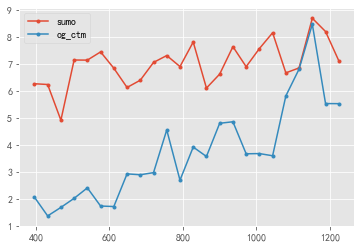

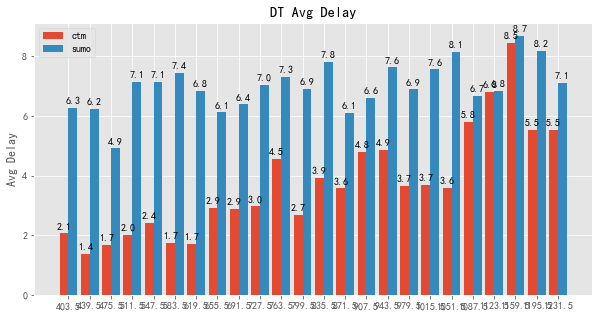

          sumo       ctm
sumo  0.654886  0.759308
ctm   0.759308  3.221123


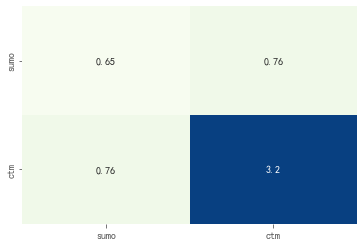

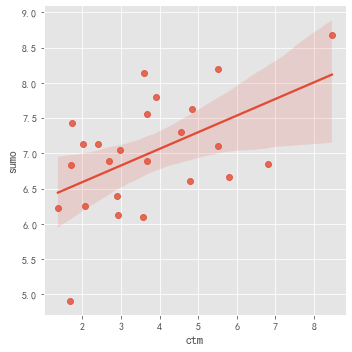

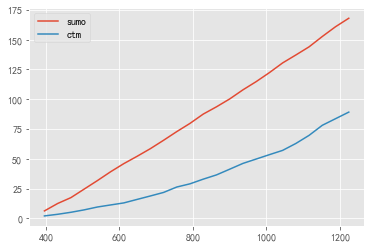

In [10]:
sumo=[6.259114264236073, 6.230879179807846, 4.910712793147511, 7.137701408581039, 7.133647099752414, 7.437552162322041, 6.834762611485845, 6.121376214662554, 6.3896218657145765, 7.047880870964132, 7.303020596520192, 6.895052991586343, 7.803926339480921, 6.098702355098881, 6.615573173099161, 7.631564328171394, 6.8913710382219255, 7.56015224629228, 8.146355670428255, 6.661644192184515, 6.844612032885339, 8.683783849576985, 8.19191642007718, 7.110741392184022]
ctm= [2.061198191209273, 1.365807381543246, 1.6810690272938122, 2.0168393308466133, 2.4038956382057886, 1.732049205086448, 1.712930527600375, 2.922097986394709, 2.8897354819557886, 2.9680308428677646, 4.547891616821289, 2.688550732352517, 3.9144052158702505, 3.5660273378545586, 4.795194539156827, 4.851336479187012, 3.6653453653508965, 3.673944039778276, 3.5926697470925073, 5.808498209173029, 6.802176128734242, 8.463009920987217, 5.525452440435236, 5.521425767378374]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay20+pred

MAE: 2.9306021047842656
MSE: 10.261104884871253
DTW距离: 45.67421920391311
            sumo        ctm
count  24.000000  24.000000
mean    6.862151   4.089108
std     1.187192   1.648458
min     4.135755   1.523980
25%     6.143216   2.835939
50%     6.712419   3.882638
75%     7.993695   4.911009
max     8.616434   8.997561


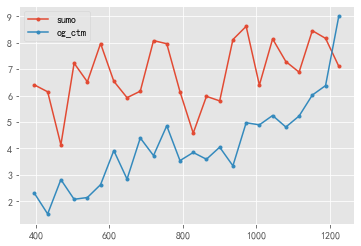

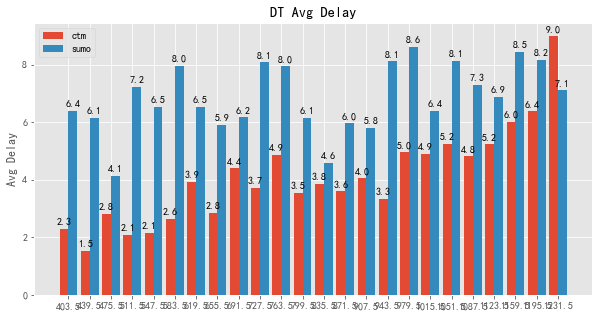

          sumo       ctm
sumo  1.409424  0.721854
ctm   0.721854  2.717415


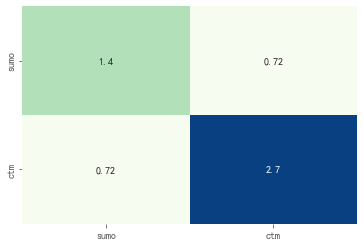

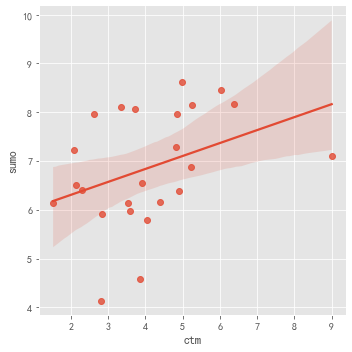

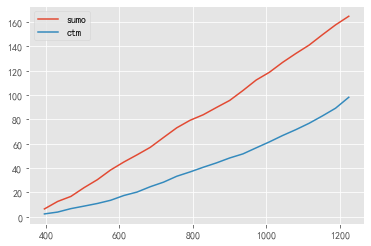

In [25]:
sumo=[6.400980537746106, 6.141392811507151, 4.135755150596392, 7.223882747331744, 6.517381812556294, 7.966207570944689, 6.540299202986853, 5.919357093848474, 6.1644824220548475, 8.076155868871814, 7.959196675446335, 6.143824125627995, 4.5779597706228, 5.968628647586261, 5.797602412955083, 8.115962541760249, 8.616433596446074, 6.3945050798320064, 8.140963378613318, 7.284920973019942, 6.884539515827323, 8.452333267573001, 8.162003125215369, 7.106858970916542]
ctm= [2.303883812644265, 1.5239800106395374, 2.8215141729875044, 2.07742994481867, 2.1439883925698022, 2.6305454427545722, 3.9185510982166636, 2.840747183019465, 4.395837350325151, 3.7289974906227807, 4.855362718755549, 3.5389848188920454, 3.8467242500998755, 3.5910909826105293, 4.0472026304765185, 3.3428892222317783, 4.9703827771273525, 4.8912178386341445, 5.244848511435769, 4.80880390514027, 5.225282148881392, 6.017502871426669, 6.375252116810191, 8.997560847889293]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay30

MAE: 3.649413968183531
MSE: 15.24182120974759
DTW距离: 63.66317374442892
            sumo        ctm
count  24.000000  24.000000
mean    6.959297   3.309883
std     0.758098   1.699925
min     4.910713   1.177454
25%     6.559085   1.978078
50%     6.969713   2.938651
75%     7.468202   4.779910
max     8.263907   6.582282


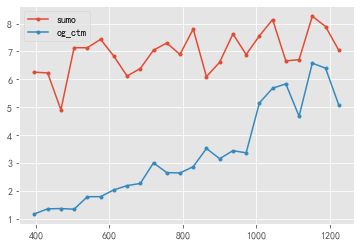

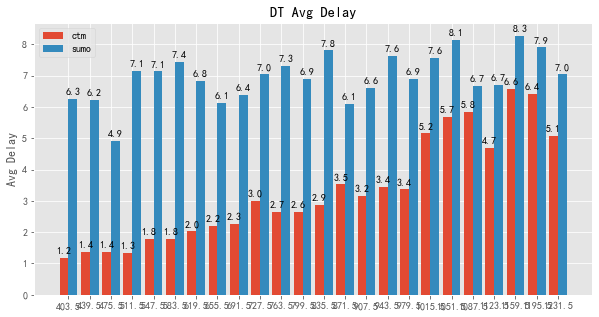

          sumo       ctm
sumo  0.574712  0.728612
ctm   0.728612  2.889745


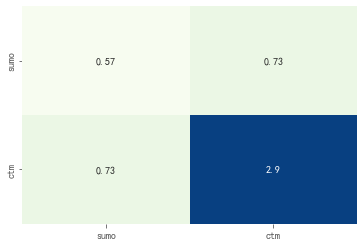

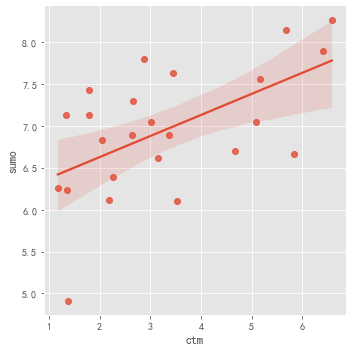

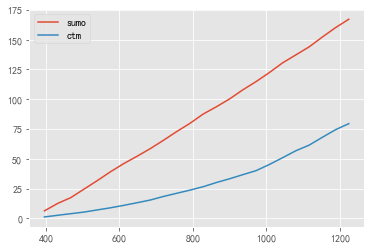

In [11]:
sumo=[6.259114264236073, 6.230879179807846, 4.910712793147511, 7.137701408581039, 7.133647099752414, 7.437552162322041, 6.834762611485845, 6.121376214662554, 6.3896218657145765, 7.047880870964132, 7.303020596520192, 6.895052991586343, 7.803926339480921, 6.098702355098881, 6.615573173099161, 7.631564328171394, 6.8913710382219255, 7.56015224629228, 8.146355670428255, 6.661644192184515, 6.708045055329401, 8.263906686024576, 7.896196800455163, 7.044373931753725]
ctm= [1.1774544282393022, 1.3592329892245205, 1.3701408559625798, 1.3457124883478337, 1.793799725445834, 1.7966106804934414, 2.0385666327043013, 2.192116217179732, 2.2695682265541772, 3.007388114929199, 2.657242688265714, 2.646195238286799, 2.86991379477761, 3.5235864465886895, 3.157054727727717, 3.4446180950511587, 3.366259878331965, 5.155184919183904, 5.683859044855291, 5.838689804077148, 4.6794869683005595, 6.58228180625222, 6.401055942882191, 5.081178925254128]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay40

MAE: 3.0697517535020595
MSE: 11.358675921900852
DTW距离: 46.01756854053647
            sumo        ctm
count  24.000000  24.000000
mean    6.853560   3.783808
std     1.071722   1.659143
min     3.868125   1.364461
25%     6.386480   2.759850
50%     6.777450   3.326459
75%     7.455039   5.051985
max     9.085495   8.090994


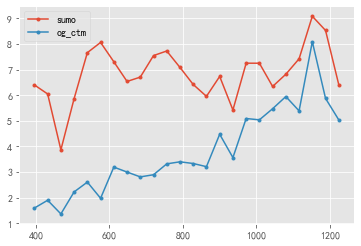

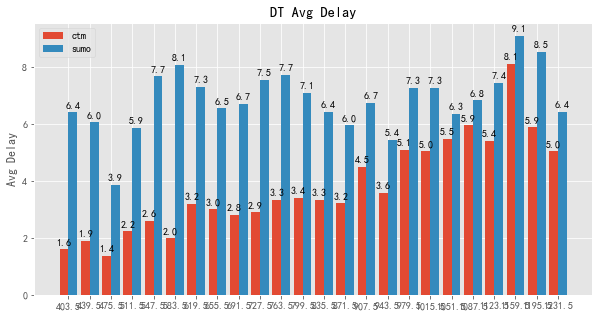

          sumo       ctm
sumo  1.148588  0.940950
ctm   0.940950  2.752755


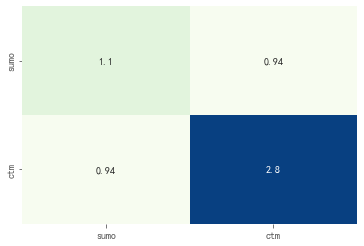

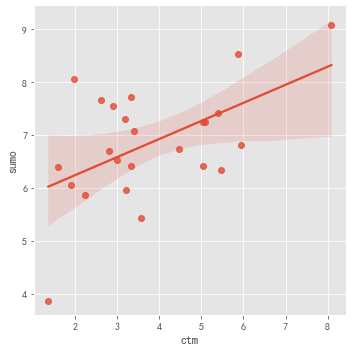

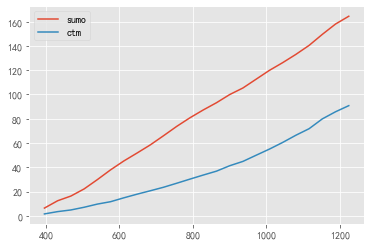

In [12]:
sumo=[6.400980537746106, 6.04987758758875, 3.8681246952830572, 5.869221766239661, 7.662740723660528, 8.062147458341064, 7.308310652881282, 6.5393508351605, 6.707477894945269, 7.549583763132747, 7.727857012824219, 7.085628110692548, 6.419995986795127, 5.957254533912925, 6.73402789420918, 5.425303088686036, 7.25144002348883, 7.250900241328474, 6.342979510942381, 6.820872401007049, 7.423523803114097, 9.085495002696673, 8.531181018512273, 6.411157875770269]
ctm= [1.594503792849454, 1.8978179584849963, 1.3644609668038108, 2.2244633327830923, 2.6066734574057837, 1.9761380282315342, 3.193002614107999, 2.9999266971241343, 2.8109090978449043, 2.894840023734353, 3.319376598704945, 3.4000359882007944, 3.33354191346602, 3.2100185480984775, 4.475419304587624, 3.564640608700839, 5.090965357693759, 5.038991407914595, 5.473061474886808, 5.949082808061079, 5.389547348022461, 8.090993707830256, 5.875716209411621, 5.0372630899602715]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay50

MAE: 3.4871366674348088
MSE: 14.035978779317162
DTW距离: 57.663624276612445
            sumo        ctm
count  24.000000  24.000000
mean    6.906743   3.419606
std     1.038202   1.500294
min     4.651816   1.330601
25%     6.279565   2.135276
50%     6.899082   3.381930
75%     7.442053   3.787591
max     9.216513   6.651220


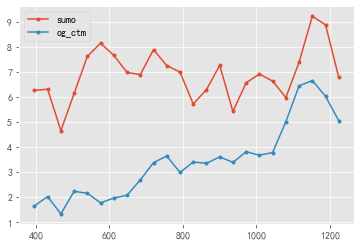

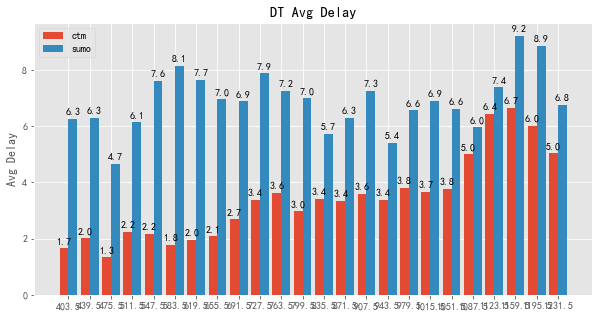

          sumo       ctm
sumo  1.077864  0.685666
ctm   0.685666  2.250883


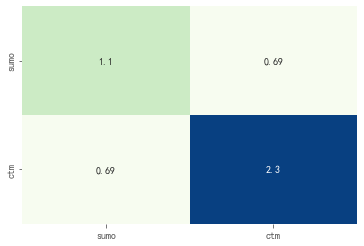

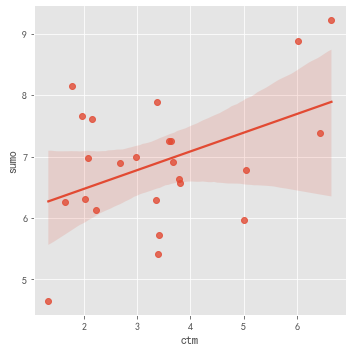

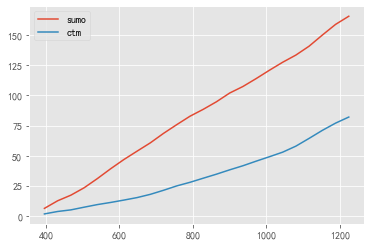

In [13]:
sumo=[6.259114264236073, 6.306243043204223, 4.651816434272849, 6.135866774157245, 7.616924421000191, 8.14220674414636, 7.654676380768625, 6.975321196425026, 6.888007402095249, 7.884838044216034, 7.248783632295201, 6.990107795668831, 5.71764233911452, 6.286382575228321, 7.259855794040207, 5.418532969043081, 6.564273148520048, 6.910156130989655, 6.631219262849838, 5.971989002615014, 7.383762868723253, 9.216513276068554, 8.874106543628233, 6.77349024347539]
ctm= [1.65210713039745, 2.022146311673251, 1.330601085316051, 2.2324406016956675, 2.1547889709472656, 1.7726710709658535, 1.9636605002663352, 2.0767376639626245, 2.6863091642206367, 3.3756451173262163, 3.641392534429377, 2.984523989937522, 3.4009278904307974, 3.3503248474814673, 3.6037889393893154, 3.3882145448164507, 3.81265943700617, 3.672356605529785, 3.7792353196577593, 5.0093676827170635, 6.442138064991344, 6.651220321655273, 6.020590175281871, 5.046702298251065]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay50+pred

MAE: 3.1926610690338157
MSE: 12.087261049798494
DTW距离: 47.36329321767477
            sumo        ctm
count  24.000000  24.000000
mean    7.019515   3.826854
std     1.208362   1.385741
min     4.026894   1.834458
25%     6.329470   2.677974
50%     7.135366   3.813531
75%     7.870673   4.633008
max     9.741268   6.499574


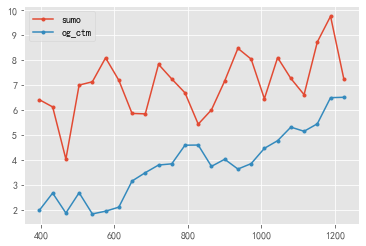

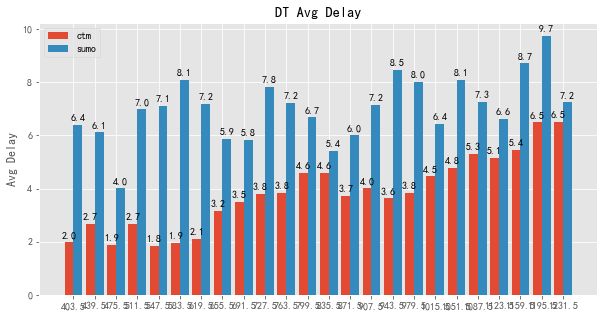

          sumo       ctm
sumo  1.460139  0.701943
ctm   0.701943  1.920279


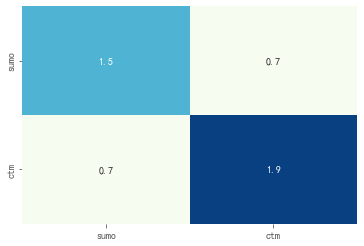

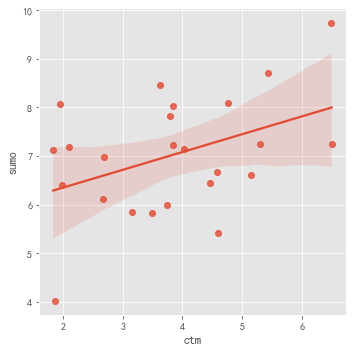

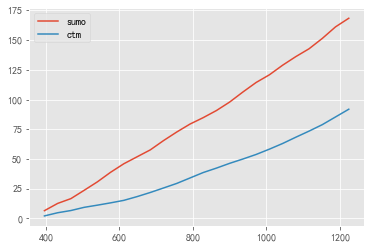

In [24]:
sumo=[6.400980537746106, 6.114938453374556, 4.02689392526375, 6.988248436730244, 7.119303377091734, 8.077417309739278, 7.181316941243728, 5.854252291318981, 5.835705312785569, 7.818667102803881, 7.233163364856109, 6.6779369622048375, 5.424597727203292, 5.99593443738103, 7.151427703281669, 8.45768058489612, 8.026691487107922, 6.442537795596116, 8.08810524847359, 7.252779758745974, 6.6052034452303285, 8.710638686134505, 9.741267751527767, 7.242677210970839]
ctm= [1.9835220683704724, 2.667900865728205, 1.8713003938848323, 2.6813314177773218, 1.834458437832919, 1.943006082014604, 2.105372819033536, 3.1502398577603428, 3.484164584766735, 3.789279677651145, 3.8377822529185903, 4.583393010226163, 4.589428468184038, 3.7367036125876685, 4.0206640416925605, 3.629517771980979, 3.846202763644132, 4.457966197620738, 4.763747562061656, 5.305710705843839, 5.140111229636452, 5.4389871250499375, 6.484134847467596, 6.499574401161888]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay60

MAE: 3.583312551179374
MSE: 14.68866192736383
DTW距离: 58.19678282473118
            sumo        ctm
count  24.000000  24.000000
mean    6.825297   3.241985
std     1.033452   1.462566
min     4.503146   1.108733
25%     6.294461   2.124725
50%     6.783623   3.077264
75%     7.387232   4.076787
max     9.251856   6.381556


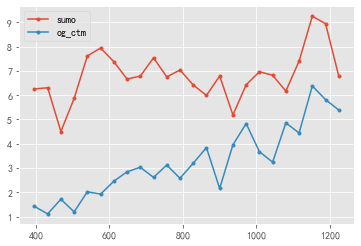

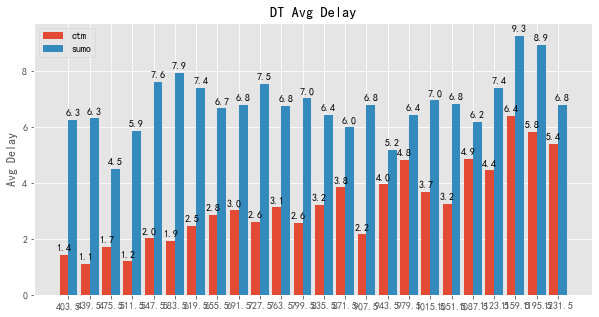

          sumo      ctm
sumo  1.068023  0.63911
ctm   0.639110  2.13910


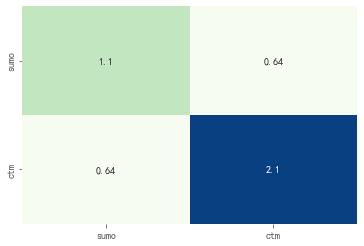

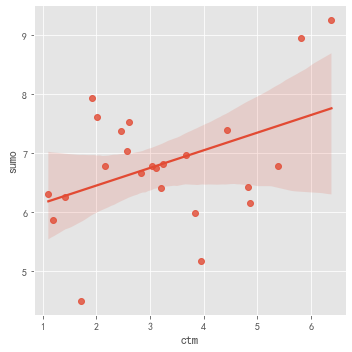

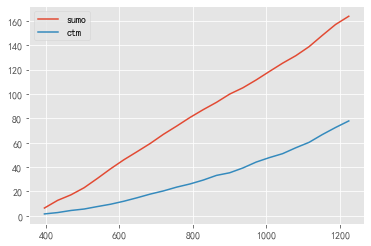

In [14]:
sumo=[6.259114264236073, 6.306243043204223, 4.503146176375146, 5.864814013696746, 7.616700990989398, 7.943925446457812, 7.38159201505015, 6.665574485293067, 6.78421406402685, 7.538035106920701, 6.753603339702619, 7.037600573302742, 6.420670888410793, 5.99044445679379, 6.791954807849474, 5.184806047355281, 6.427440551897475, 6.9647369491579845, 6.821427793883338, 6.1661712184883175, 7.404150134525589, 9.251856024079482, 8.945875990148851, 6.783031846515953]
ctm= [1.4203500747680664, 1.1087325486269863, 1.7133601145310835, 1.193411025134, 2.022129622372714, 1.923609646883878, 2.4554926698858086, 2.8430292823097925, 3.032160672274503, 2.6135624538768423, 3.1223665584217417, 2.574750293384899, 3.1989039074290884, 3.838119940324263, 2.158923799341375, 3.9546918869018555, 4.83097336509011, 3.672875491055575, 3.2422924041748047, 4.859659455039284, 4.443070671775124, 6.381555904041637, 5.81611459905451, 5.387492613358931]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay70

MAE: 4.179773526122998
MSE: 18.888530634776952
DTW距离: 74.51606673075896
            sumo        ctm
count  24.000000  24.000000
mean    6.862545   2.682771
std     0.724545   1.404735
min     4.910713   1.065157
25%     6.389240   1.473136
50%     6.864908   2.592085
75%     7.179031   3.198811
max     8.285218   6.390839


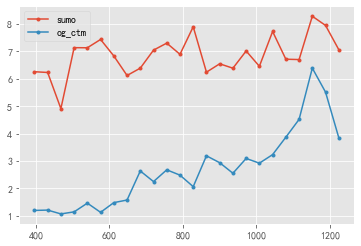

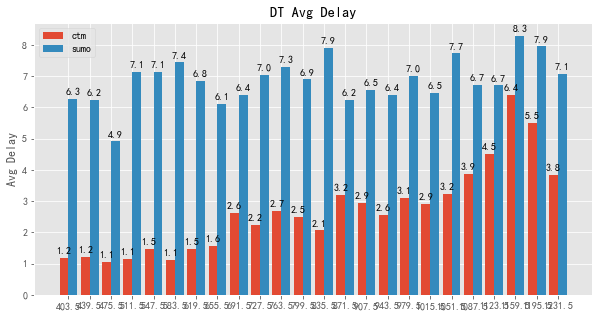

          sumo       ctm
sumo  0.524966  0.509284
ctm   0.509284  1.973279


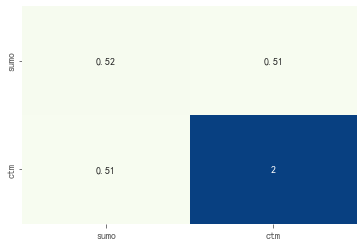

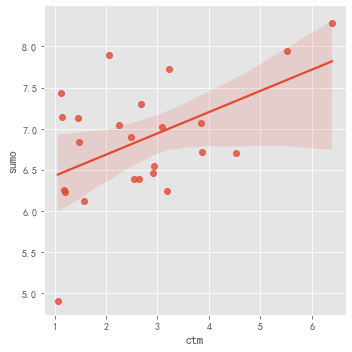

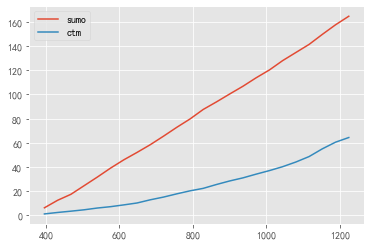

In [15]:
sumo=[6.259114264236073, 6.230879179807846, 4.910712793147511, 7.137701408581039, 7.133647099752414, 7.437552162322041, 6.834762611485845, 6.121376214662554, 6.3896218657145765, 7.047880870964132, 7.303020596520192, 6.895052991586343, 7.900961534118727, 6.242377747663024, 6.547983858428999, 6.388095143149559, 7.016097317558225, 6.457065777832445, 7.728276927694872, 6.7159608381578835, 6.702951451010929, 8.285218213812803, 7.949750080797068, 7.065011384155499]
ctm= [1.1929191242564807, 1.2048632448369807, 1.065157326785001, 1.1399390480735085, 1.458932486447421, 1.1233328689228406, 1.4778702909296209, 1.57230637290261, 2.633728330785578, 2.245954816991633, 2.6755677569996226, 2.4814399805935947, 2.0608624545010654, 3.1879281997680664, 2.9356631365689365, 2.5504409183155405, 3.091309070587158, 2.9188628630204634, 3.231460831382058, 3.8678533380681817, 4.517810561440208, 6.390838623046875, 5.512544025074352, 3.8489220359108667]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay 100

MAE: 4.056551667382977
MSE: 17.944029125812985
DTW距离: 69.72567307751567
            sumo        ctm
count  24.000000  24.000000
mean    6.959297   2.902746
std     0.758098   1.409873
min     4.910713   0.980841
25%     6.559085   1.734874
50%     6.969713   2.740458
75%     7.468202   3.740283
max     8.263907   6.731805


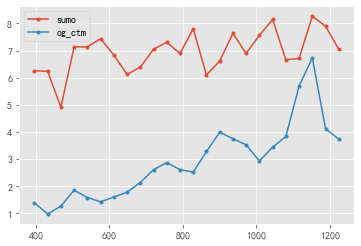

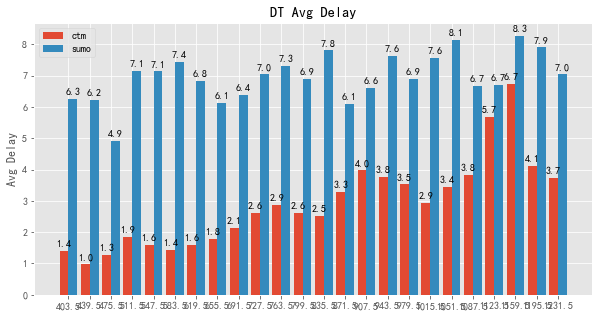

          sumo       ctm
sumo  0.574712  0.504662
ctm   0.504662  1.987743


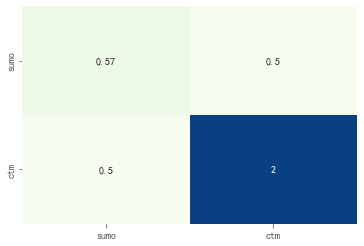

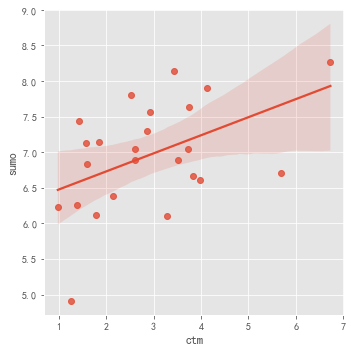

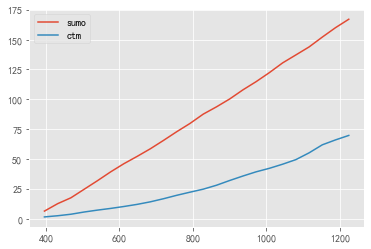

In [16]:
sumo=[6.259114264236073, 6.230879179807846, 4.910712793147511, 7.137701408581039, 7.133647099752414, 7.437552162322041, 6.834762611485845, 6.121376214662554, 6.3896218657145765, 7.047880870964132, 7.303020596520192, 6.895052991586343, 7.803926339480921, 6.098702355098881, 6.615573173099161, 7.631564328171394, 6.8913710382219255, 7.56015224629228, 8.146355670428255, 6.661644192184515, 6.708045055329401, 8.263906686024576, 7.896196800455163, 7.044373931753725]
ctm= [1.388739455829967, 0.9808407046578147, 1.2649211016568271, 1.8582471934231846, 1.5831214731389827, 1.4270367405631326, 1.6033014384183017, 1.778731562874534, 2.1381050890142266, 2.610309774225408, 2.868771553039551, 2.6121453805403276, 2.5210736014626245, 3.280853574926203, 3.9871866052800957, 3.753001473166726, 3.52666052904996, 2.933431321924383, 3.43952937559648, 3.83341139013117, 5.688891844315962, 6.73180493441495, 4.119734330610796, 3.73604340986772]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# delay100+pred

MAE: 3.8545586289944986
MSE: 16.233552949122483
DTW距离: 58.01628219918334
            sumo        ctm
count  24.000000  24.000000
mean    7.019515   3.164957
std     1.208362   1.194466
min     4.026894   1.283674
25%     6.329470   2.319390
50%     7.135366   3.072604
75%     7.870673   3.721985
max     9.741268   6.105686


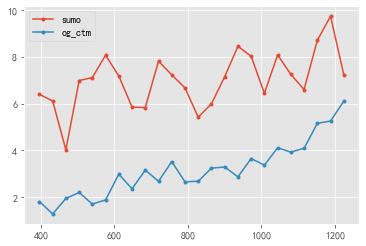

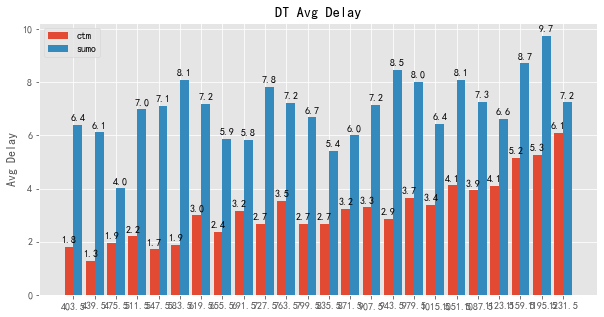

          sumo       ctm
sumo  1.460139  0.725567
ctm   0.725567  1.426749


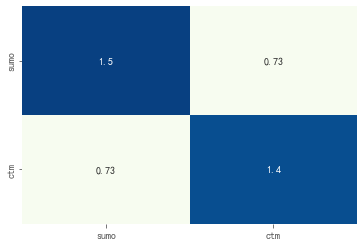

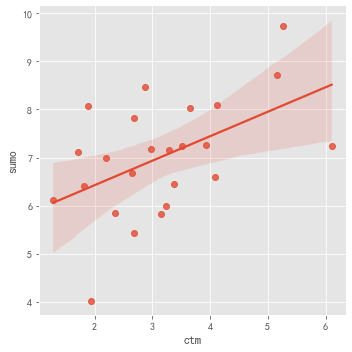

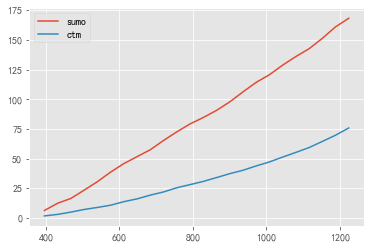

In [17]:
sumo=[6.400980537746106, 6.114938453374556, 4.02689392526375, 6.988248436730244, 7.119303377091734, 8.077417309739278, 7.181316941243728, 5.854252291318981, 5.835705312785569, 7.818667102803881, 7.233163364856109, 6.6779369622048375, 5.424597727203292, 5.99593443738103, 7.151427703281669, 8.45768058489612, 8.026691487107922, 6.442537795596116, 8.08810524847359, 7.252779758745974, 6.6052034452303285, 8.710638686134505, 9.741267751527767, 7.242677210970839]
ctm= [1.8147413297133013, 1.2836742401123047, 1.9444036483764648, 2.200952009721236, 1.7066239226948132, 1.8826935508034446, 2.9862005060369317, 2.358869856054133, 3.1590078093788843, 2.680776769464666, 3.5208088701421563, 2.657638896595348, 2.6828403906388716, 3.240785598754883, 3.2919914072210137, 2.8699649464000356, 3.6531335657293145, 3.3693705905567515, 4.113812013105913, 3.9285395362160425, 4.090288335626775, 5.157605084505948, 5.258549776944247, 6.105686101046476]
time0= [396, 432, 468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900, 936, 972, 1008, 1044, 1080, 1116, 1152, 1188, 1224]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)